In [1]:
import numpy as np
from PIL import Image

In [2]:
def array_to_red_image(array) -> Image:
    img = None
    # get absolute values
    array = abs(array)
    # get max value
    max = np.max(array)
    # normalize to 0.0 - 1.0 range
    arrayuint8 = array.astype(np.float64) / max
    # make it uint8 data
    arrayuint8 = 255 * arrayuint8
    # grey image from array
    img = Image.fromarray(arrayuint8.astype(np.uint8), mode='L')
    # empty grey image
    zero = np.zeros(array.shape, dtype=np.uint8)
    img_zero = Image.fromarray(zero, mode='L')
    # merge it. Real image goes to R channel, while G and B channels filled with zeroes
    img = Image.merge(mode='RGB', bands=(img, img_zero, img_zero))
    return img

In [3]:
def transform_image(img: Image, rotation=0.0, width=1024, height=1024):
    img_out = img.rotate(rotation, expand=True)
    img_out = img_out.resize((width, height))
    return img_out

In [4]:
t = np.linspace(0, 1.0, int(44100 * 1.0))
signal = np.sin(440 * 2 * np.pi * t)

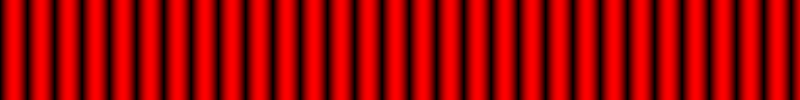

In [5]:
part = signal[0:int(44100 / 30)]
img = transform_image(array_to_red_image(part), 90, 800, 100)
display(img)

In [47]:
def image_plot_like(signal, width, height, background_rgb, foreground_rgb):
    img = None

    min = np.min(signal)
    max = np.max(signal)

    # Ok, the issue is: drawing only each nth value directly with dots doesn't bring
    # expected outcome, as it leads to showing only interference-like image.
    # Hence, we first draw it at original length, and then rescale the image (not data).
    rgb_data = np.zeros([height, signal.size, 3], dtype=np.uint8)
    rgb_data[:, :, :] = [background_rgb[0], background_rgb[1], background_rgb[2]]
    for x in range(0, signal.size, 1):
        signal_value = signal[x]
        normalized_value = signal_value / (max - min) + 0.5
        uint8_value = int(normalized_value * height)
        if uint8_value == height: uint8_value -= 1
        rgb_data[uint8_value][x] = [foreground_rgb[0], foreground_rgb[1], foreground_rgb[2]]
    # Make an image
    img = Image.fromarray(rgb_data, mode='RGB')
    # and scale it
    img = img.resize((width, height), resample=Image.BILINEAR)

    return img

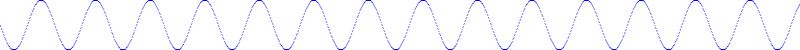

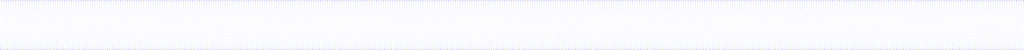

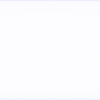

In [54]:
part = signal[0:int(44100 / 30)*1]
img = image_plot_like(part, 800, 50, (255,255,255), (0,0,255))
display(img)

part = signal
img = image_plot_like(part, 1024, 50, (255,255,255), (0,0,255))
display(img)

part = signal
img = image_plot_like(part, 100, 100, (255,255,255), (0,0,255))
display(img)